In [5]:
!pip install quandl


In [6]:
!pip install plotly

In [7]:
!pip install pandas_datareader

In [11]:
import pandas as pd #for reading and working with data
import matplotlib.pyplot as plt #for visuals
import seaborn as sns #for visuals
import numpy as np #for doing math/stat calculations, working with arrays

import quandl #for downloading data from Quandl website
from pandas_datareader import data #for downloading data from Yahoo Finance website

##plotly is for interactive plotting
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go #the basic charts that we will use are mainly stored under graph_objs
init_notebook_mode(connected=True) #if we want the charts to be displayed in JN


## Problem 1

In [13]:
data_salary=pd.read_csv('salary.csv')

In [14]:
data_salary.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,Geder,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,NaN,Widowed,NaN,Not-in-family,White,Female,NaN,4356.0,40.0,United-States,<=50K
1,82,Private,132870,HS-grad,NaN,Widowed,Exec-managerial,Not-in-family,White,Female,NaN,4356.0,18.0,United-States,<=50K
2,66,?,186061,Some-college,10.0,Widowed,NaN,Unmarried,Black,Female,NaN,4356.0,40.0,United-States,<=50K
3,54,Private,140359,7th-8th,NaN,Divorced,Machine-op-inspct,Unmarried,White,Female,NaN,3900.0,40.0,United-States,<=50K
4,41,Private,264663,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,NaN,3900.0,40.0,United-States,<=50K


## Problem 2 

In [15]:
data_salary.shape

(32561, 15)

There are 32561 rows and 15 columns

In [19]:
data_salary.isnull().sum()

age                   0
workclass             0
fnlwgt                0
education             0
education.num     14754
marital.status        0
occupation         1843
relationship          0
race                  0
Geder                 0
capital.gain      29849
capital.loss      31042
hours.per.week      458
native.country      583
income                0
dtype: int64

**Interpretation: education.num has 14754 missing values, occupation 1843, capital.gain 29849, capital.loss 31042, hour.per.week 458 and native.country 583 missing values**

## Problem 4

In [21]:
data_salary['workclass']=data_salary['workclass'].replace(['?'],'NA')

In [22]:
data_salary.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,Geder,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NA,77053,HS-grad,NaN,Widowed,NaN,Not-in-family,White,Female,NaN,4356.0,40.0,United-States,<=50K
1,82,Private,132870,HS-grad,NaN,Widowed,Exec-managerial,Not-in-family,White,Female,NaN,4356.0,18.0,United-States,<=50K
2,66,NA,186061,Some-college,10.0,Widowed,NaN,Unmarried,Black,Female,NaN,4356.0,40.0,United-States,<=50K
3,54,Private,140359,7th-8th,NaN,Divorced,Machine-op-inspct,Unmarried,White,Female,NaN,3900.0,40.0,United-States,<=50K
4,41,Private,264663,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,NaN,3900.0,40.0,United-States,<=50K


In [26]:
data_salary.drop(columns=['education.num'],axis=1,inplace=True)
data_salary.drop(columns=['occupation'],axis=1,inplace=True)
data_salary.drop(columns=['capital.gain'],axis=1,inplace=True)
data_salary.drop(columns=['capital.loss'],axis=1,inplace=True)

In [27]:
data_salary.columns

Index(['age', 'workclass', 'fnlwgt', 'marital.status', 'relationship', 'race',
       'Geder', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [28]:
data_salary.dropna(inplace=True)

In [29]:
data_salary.shape

(31527, 10)

**This data without the missing values has 10 columns and 31527 rows**

## Problem 5

In [30]:
data_salary['marital.status']=data_salary['marital.status'].replace(['.'],'_')

In [35]:
data_numeric=data_numeric=data_salary.select_dtypes(exclude='object')


## Problem 6

In [33]:
data_numeric.corr()

,age,fnlwgt,hours.per.week
age,1.000000,-0.077234,0.103418
fnlwgt,-0.077234,1.000000,-0.023476
hours.per.week,0.103418,-0.023476,1.000000


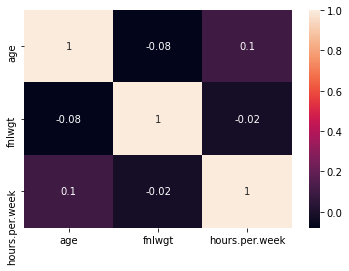

In [34]:
sns.heatmap(data_numeric.corr().round(2) #corr table
           ,annot=True #to show corr values on the cells on the chart below
           )

plt.show()

## Problem 7

In [37]:
data_numeric.age.mean()

38.45196181051163

In [38]:
data_numeric.age.median()

37.0

In [39]:
data_numeric.age.min()

17

In [40]:
data_numeric.age.max()

90

In [41]:
data_numeric.age.std()

13.457003406740395

## Problem 8

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



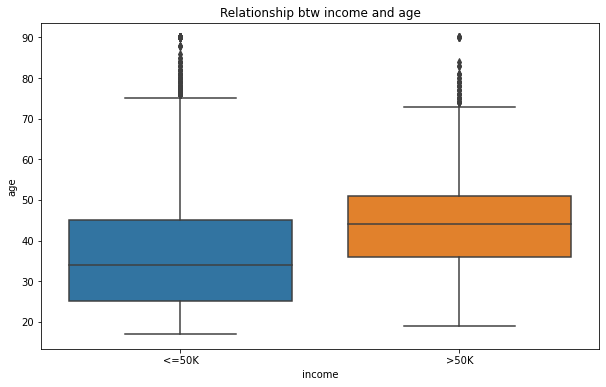

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(data_salary.income, 
           data_salary.age,
           orient='v')

plt.title("Relationship btw income and age")
plt.show()

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



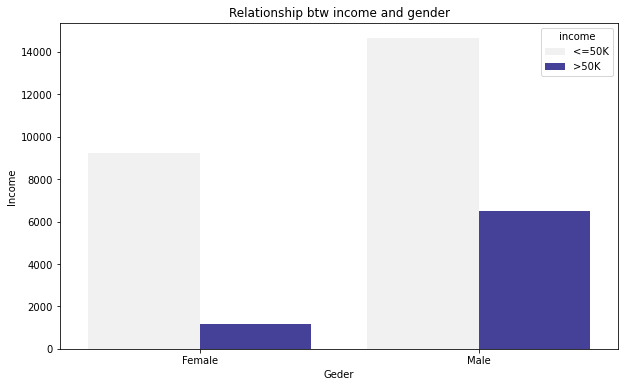

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(data_salary.Geder, hue=data_salary['income'], color='#3832a8')

plt.xlabel('Geder')
plt.ylabel('Income')
plt.title('Relationship btw income and gender')
plt.show()

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



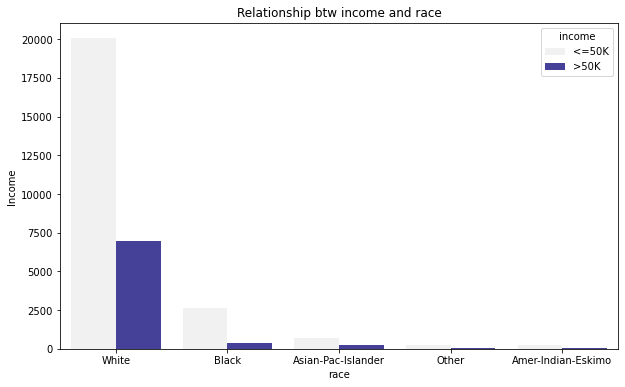

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(data_salary.race, hue=data_salary['income'], color='#3832a8')

plt.xlabel('race')
plt.ylabel('Income')
plt.title('Relationship btw income and race')
plt.show()

In [52]:
data_salary=data_salary.rename({'hours.per.week':'hours'},axis=1)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



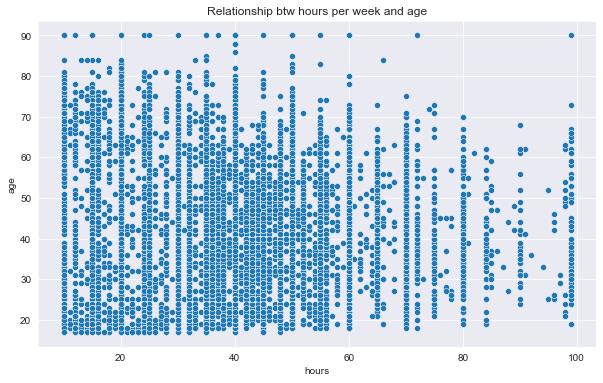

In [55]:
plt.figure(figsize=(10,6)) #figure size

sns.set_style('darkgrid') #setting style for the charts

sns.scatterplot(data_salary.hours, #X-axis values
            data_salary.age #Y-axis values
               )
plt.title("Relationship btw hours per week and age")
plt.show()

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



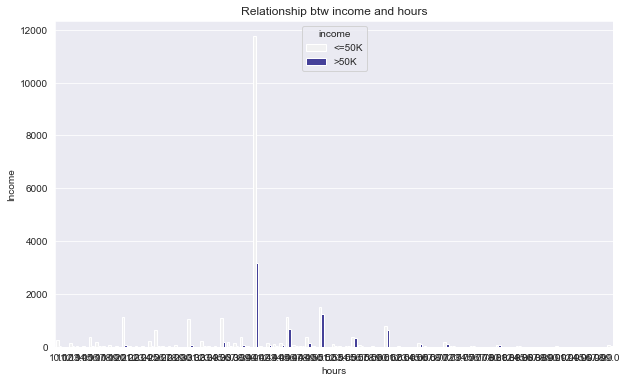

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(data_salary.hours, hue=data_salary['income'], color='#3832a8')

plt.xlabel('hours')
plt.ylabel('Income')
plt.title('Relationship btw income and hours')
plt.show()

## Problem 9

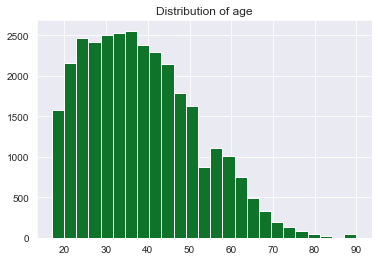

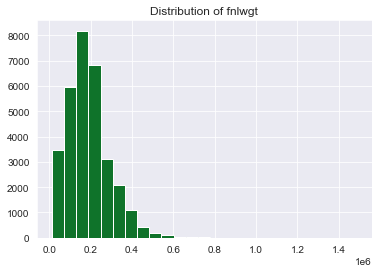

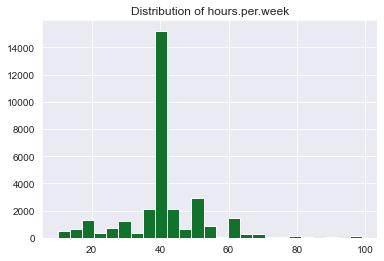

In [57]:
#printing histograms for all numeric variables by using for loop
for i in data_numeric.columns:
    plt.hist(data_numeric[i],
         color='#0f732a',
         bins=25
        )
    plt.title(f"Distribution of {i}")
    plt.show()

## Problem 10

**From the figures that we got, we can see that people within the age 35+ earn more, than those who are under 35. There are more males that earn higher salaries than females. The last figure shows that those people who work more hours, earn higher salaries.**

## Problem 11

In [58]:
data_dis=data.DataReader(name='DIS', #ticker of staock
                        data_source='yahoo', #source of data, for example 'fred' is another data source
                        start='2008-01-01', end='2021-01-01', #time period
                        pause=1 # to puase some time in seconds after each request to Yahoo, in order not to get blocked
                        )

In [59]:
data_dis=data.DataReader(name='MCD', #ticker of staock
                        data_source='yahoo', #source of data, for example 'fred' is another data source
                        start='2008-01-01', end='2021-01-01', #time period
                        pause=1 # to puase some time in seconds after each request to Yahoo, in order not to get blocked
                        )

In [60]:
data_dis=data.DataReader(name='NOK', #ticker of staock
                        data_source='yahoo', #source of data, for example 'fred' is another data source
                        start='2008-01-01', end='2021-01-01', #time period
                        pause=1 # to puase some time in seconds after each request to Yahoo, in order not to get blocked
                        )

In [61]:
data_dis=data.DataReader(name='PICK', #ticker of staock
                        data_source='yahoo', #source of data, for example 'fred' is another data source
                        start='2008-01-01', end='2021-01-01', #time period
                        pause=1 # to puase some time in seconds after each request to Yahoo, in order not to get blocked
                        )

In [63]:
data_dis=data.DataReader(name='MSFT', #ticker of staock
                        data_source='yahoo', #source of data, for example 'fred' is another data source
                        start='2008-01-01', end='2021-01-01', #time period
                        pause=1 # to puase some time in seconds after each request to Yahoo, in order not to get blocked
                        )

## Problem 12

In [69]:
tickers=['NOK','MSFT','DIS','MCD','PICK']

In [70]:
data_stocks=data.DataReader(name=tickers,
                           data_source='yahoo',
                           start='2008-01-01',
                           end='2021-01-01',
                           pause=0.1
                           )

In [76]:
data_stocks.head()

Attributes  Adj Close                                            Close  \
Symbols           NOK       MSFT        DIS        MCD PICK        NOK   
Date                                                                     
2008-01-02  23.142698  26.195889  27.012505  39.046745  NaN  37.400002   
2008-01-03  23.600601  26.307467  26.953121  38.932507  NaN  38.139999   
2008-01-04  22.264019  25.571117  26.410151  38.341091  NaN  35.980000   
2008-01-07  21.459595  25.742189  26.435602  38.999710  NaN  34.680000   
2008-01-08  21.212078  24.879400  25.909611  38.361263  NaN  34.279999   

Attributes                                        ...       Open             \
Symbols          MSFT        DIS        MCD PICK  ...        NOK       MSFT   
Date                                              ...                         
2008-01-02  35.220001  31.840000  58.099998  NaN  ...  38.340000  35.790001   
2008-01-03  35.369999  31.770000  57.930000  NaN  ...  38.090000  35.220001   
2008-01-04  34.380001  31.129999  57.049999  NaN  ...  37.189999  35.189999   
2008-01-07  34.610001  31.160000  58.029999  NaN  ...  36.139999  34.549999   
2008-01-08  33.450001  30.540001  57.080002  NaN  ...  35.480000  34.709999   

Attributes                                 Volume                          \
Symbols           DIS        MCD PICK         NOK        MSFT         DIS   
Date                                                                        
2008-01-02  32.320000  59.480000  NaN  11473900.0  63004200.0   9269900.0   
2008-01-03  31.879999  58.400002  NaN   9791200.0  49599600.0   9681100.0   
2008-01-04  31.000000  57.330002  NaN  15597700.0  72090800.0   9550700.0   
2008-01-07  31.379999  57.360001  NaN  18557000.0  80164300.0  10742900.0   
2008-01-08  31.250000  58.439999  NaN  18097200.0  79148300.0  13014300.0   

Attributes                   
Symbols            MCD PICK  
Date                         
2008-01-02   7858300.0  NaN  
2008-01-03   6514700.0  NaN  
2008-01-04   9687500.0  NaN  
2008-01-07  10784500.0  NaN  
2008-01-08  10080800.0  NaN  

[5 rows x 30 columns]

In [77]:
data_stocks.columns=data_stocks.columns.map('_'.join)

In [78]:
data_stocks.head()

,Adj Close_NOK,Adj Close_MSFT,Adj Close_DIS,Adj Close_MCD,Adj Close_PICK,Close_NOK,Close_MSFT,Close_DIS,Close_MCD,Close_PICK,...,Open_NOK,Open_MSFT,Open_DIS,Open_MCD,Open_PICK,Volume_NOK,Volume_MSFT,Volume_DIS,Volume_MCD,Volume_PICK
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,23.142698,26.195889,27.012505,39.046745,NaN,37.400002,35.220001,31.840000,58.099998,NaN,...,38.340000,35.790001,32.320000,59.480000,NaN,11473900.0,63004200.0,9269900.0,7858300.0,NaN
2008-01-03,23.600601,26.307467,26.953121,38.932507,NaN,38.139999,35.369999,31.770000,57.930000,NaN,...,38.090000,35.220001,31.879999,58.400002,NaN,9791200.0,49599600.0,9681100.0,6514700.0,NaN
2008-01-04,22.264019,25.571117,26.410151,38.341091,NaN,35.980000,34.380001,31.129999,57.049999,NaN,...,37.189999,35.189999,31.000000,57.330002,NaN,15597700.0,72090800.0,9550700.0,9687500.0,NaN
2008-01-07,21.459595,25.742189,26.435602,38.999710,NaN,34.680000,34.610001,31.160000,58.029999,NaN,...,36.139999,34.549999,31.379999,57.360001,NaN,18557000.0,80164300.0,10742900.0,10784500.0,NaN
2008-01-08,21.212078,24.879400,25.909611,38.361263,NaN,34.279999,33.450001,30.540001,57.080002,NaN,...,35.480000,34.709999,31.250000,58.439999,NaN,18097200.0,79148300.0,13014300.0,10080800.0,NaN


In [2]:
#interactive chart of Close prices for stocks
fig=go.Figure()

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Close_NOK,
                        mode='lines',
                        name='Close Price of NOK'))
fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Close_DIS,
                        mode='lines',
                        name='Close Price of DIS'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Close_MSFT,
                        mode='lines',
                        name='Close Price of MSFT'))
fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Close_MCD,
                        mode='lines',
                        name='Close Price of MCD'))
fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Close_PICK,
                        mode='lines',
                        name='Close Price of PICK'))


fig.update_layout(title='Comparison of Close Prices Between Stocks')

fig.show()

NameError: name 'go' is not defined

## Problem 13

In [1]:
data_num=data_salary.select_dtypes(exclude=['object'])

NameError: name 'data_salary' is not defined

In [4]:
for i in data_num.columns:
    fig = px.histogram(data_frame=data_num,x=i)
    fig.update_layout(
        title=i,
        height=500,
        width=500)
    fig.show()

NameError: name 'data_num' is not defined